In [17]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [4]:
#1. 데이터 불러오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [27]:
##### 2. 전처리 (preprocessing)

def preprocess_data(original_df):
    df = original_df.copy()

    age_sort ={
        '만18-34세':0,'만35세-37':1,'만 38-39세':2,
        '만40-42세':3,'만43-44세':4,'만45-50세':5,'알 수 없음':-1
    }
    df['age']=df['시술 당시 나이'].map(age_sort)

    # 불필요한 컬럼 제거
    drop_cols = ['시술 시기 코드','여성 주 불임 원인','여성 부 불임 원인','남성 주 불인 원인','남성 부 불임 원인']
    df =  df.drop(columns=[c for c in drop_cols if c in df.columns])
    return df

#2-1 전처리 적용
train_df = preprocess_data(train)
test_df = preprocess_data(test)

#3.모델 학습 
label_column = '임신 성공 여부'

predictor = TabularPredictor(
    label = label_column,
    problem_type='binary',
    eval_metric = 'roc_auc'
).fit(
    train_data=train_df,
    time_limit=60,
    presets='best_quality'
)
    

No path specified. Models will be saved in: "AutogluonModels/ag-20260209_014924"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.5.0
Python Version:     3.13.5
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 25.2.0: Tue Nov 18 21:09:40 PST 2025; root:xnu-12377.61.12~1/RELEASE_ARM64_T6000
CPU Count:          10
Pytorch Version:    2.9.1
CUDA Version:       CUDA is not available
GPU Count:          WARNING: Exception was raised when calculating GPU count (AssertionError)
Memory Avail:       3.00 GB / 16.00 GB (18.7%)
Disk Space Avail:   296.71 GB / 460.43 GB (64.4%)
Presets specified: ['best_quality']
Using hyperparameters preset: hyperparameters='zeroshot'
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DySt

In [23]:
#4. 학습 결과 요약
leaderboard = predictor.leaderboard(train_df,silent=True)
print(leaderboard)


                 model  score_test  score_val eval_metric  pred_time_test  \
0    LightGBMXT_BAG_L2    0.749939   0.738118     roc_auc        6.820614   
1    LightGBMXT_BAG_L1    0.749438   0.738932     roc_auc        4.631859   
2  WeightedEnsemble_L3    0.749438   0.738932     roc_auc        4.635647   
3  WeightedEnsemble_L2    0.749438   0.738932     roc_auc        4.635701   

   pred_time_val   fit_time  pred_time_test_marginal  pred_time_val_marginal  \
0       0.967568  36.046584                 2.188755                0.341690   
1       0.625878  23.333764                 4.631859                0.625878   
2       0.667078  25.648987                 0.003788                0.041200   
3       0.669412  23.379864                 0.003842                0.043534   

   fit_time_marginal  stack_level  can_infer  fit_order  
0          12.712820            2       True          3  
1          23.333764            1       True          1  
2           2.315223            3      

In [28]:
#5. 테스트 데이터 예측
predictions = predictor.predict(test_df)

In [30]:
#6. 제출 파일 생성
submission = pd.read_csv('sample_submission.csv')
submission[label_column] = predictions
submission.to_csv('my_2_submission.csv',index=False)

print("모든 과정이 완료되었습니다! 제출 파일을 확인해 보아요.")


모든 과정이 완료되었습니다! 제출 파일을 확인해 보아요.


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256351 entries, 0 to 256350
Data columns (total 69 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     256351 non-null  object 
 1   시술 시기 코드               256351 non-null  object 
 2   시술 당시 나이               256351 non-null  object 
 3   임신 시도 또는 마지막 임신 경과 연수  9370 non-null    float64
 4   시술 유형                  256351 non-null  object 
 5   특정 시술 유형               256349 non-null  object 
 6   배란 자극 여부               256351 non-null  int64  
 7   배란 유도 유형               256351 non-null  object 
 8   단일 배아 이식 여부            250060 non-null  float64
 9   착상 전 유전 검사 사용 여부       2718 non-null    float64
 10  착상 전 유전 진단 사용 여부       250060 non-null  float64
 11  남성 주 불임 원인             256351 non-null  int64  
 12  남성 부 불임 원인             256351 non-null  int64  
 13  여성 주 불임 원인             256351 non-null  int64  
 14  여성 부 불임 원인             256351 non-nu

In [12]:
print(train['시술 당시 나이'].value_counts())
percents = train['시술 당시 나이'].value_counts(normalize=True) * 100
print(percents)

# import matplotlib.pyplot as plt

# train['시술 당시 나이'].value_counts(normalize=True).plot(kind='bar')
# plt.title('Age Distribution (%)')
# plt.show()

시술 당시 나이
만18-34세    102476
만35-37세     57780
만38-39세     39247
만40-42세     37348
만43-44세     12253
만45-50세      6918
알 수 없음        329
Name: count, dtype: int64
시술 당시 나이
만18-34세    39.974878
만35-37세    22.539409
만38-39세    15.309868
만40-42세    14.569087
만43-44세     4.779775
만45-50세     2.698644
알 수 없음      0.128340
Name: proportion, dtype: float64


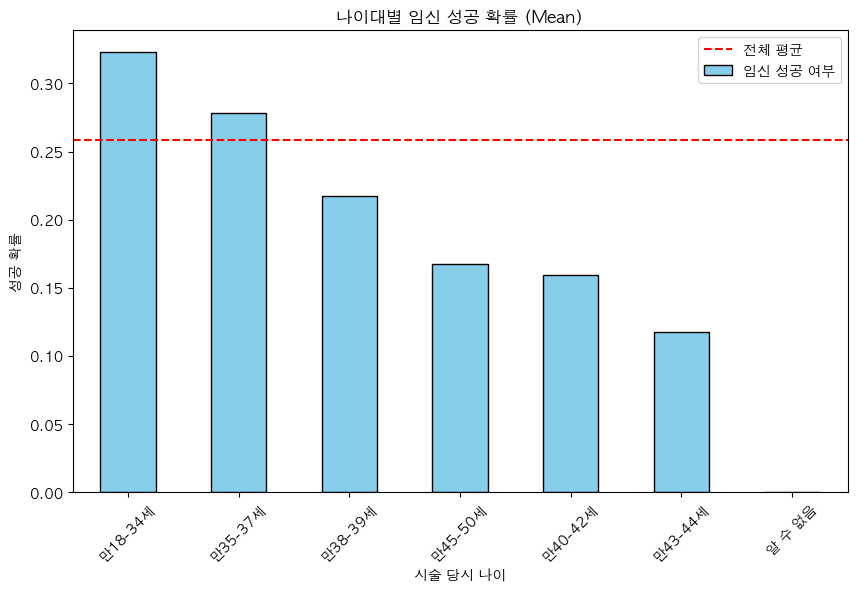

In [16]:
# 나이대별 성공률 계산
age_success_rate = train.groupby('시술 당시 나이')['임신 성공 여부'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
age_success_rate.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('나이대별 임신 성공 확률 (Mean)')
plt.xlabel('시술 당시 나이')
plt.ylabel('성공 확률')
plt.xticks(rotation=45)
plt.axhline(y=train['임신 성공 여부'].mean(), color='red', linestyle='--', label='전체 평균') # 전체 평균선
plt.legend()
plt.show()